In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('titanic.csv')

# Remove columns
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Fill missing values 
df['Age'] = df['Age'].fillna(df['Age'].median())

# Use get_dummies method
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

# Fill missing values + get_dummies
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Split the DataFrame into input features (X) and target variable (y).
X = df.drop('Survived', axis=1)
y = df['Survived']

# split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Import the SVM classifier from sklearn and create a SVM classifier instance with a linear kernel
clf = svm.SVC(kernel = 'linear')

In [11]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set using the trained classifier
y_pred = clf.predict(X_test)

# Print the accuracy of the model on the test set.
print(accuracy_score(y_test, y_pred))

# Print the confusion matrix of the model on the test set.
# Use the confusion_matrix function from sklearn.metrics.
print(confusion_matrix(y_test, y_pred))

0.7821229050279329
[[88 17]
 [22 52]]


איריס

In [12]:
# Import necessary libraries
from sklearn.datasets import load_iris

In [26]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  #  כל השורות ורק שתי עמודות (sepal length and sepal width)
y = iris.target

# Use only two classes for binary classification (e.g., 0 and 1)
X = X[y != 2]
y = y[y != 2]

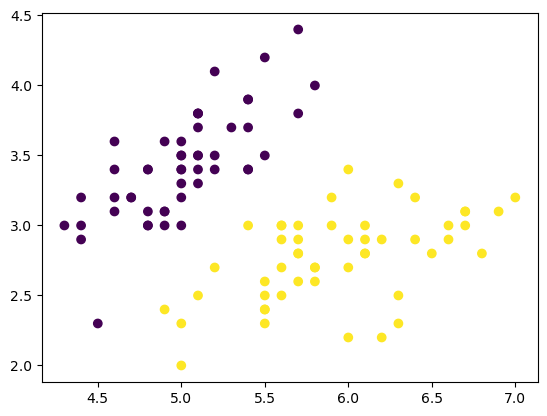

In [27]:
plt.scatter(X[:,0],X[:,1], c=y)

In [30]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM with RBF kernel
svc = svm.SVC(kernel='rbf',C=10 ,gamma=100)#  adjust C and gamma for better results
#svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=10, gamma=100)

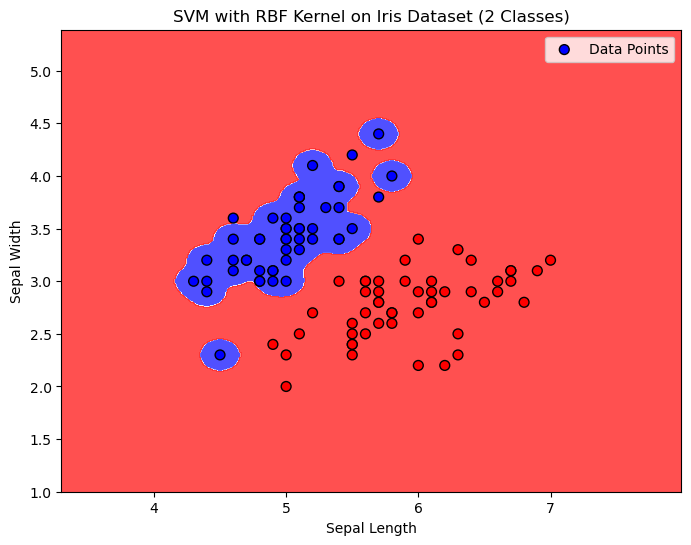

In [31]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict over the mesh grid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.bwr)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k', s=50, label="Data Points")
plt.title("SVM with RBF Kernel on Iris Dataset (2 Classes)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()